# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("alzheimer.csv")

In [4]:
df = data.dropna()

In [5]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [6]:
df.rename(columns={"M/F":"GENDER"}, inplace=True)

In [7]:
df["Group"] = df['Group'].map({"Nondemented":"Nondemented", "Demented":"Demented", "Converted":"Demented"})

In [8]:
pd.crosstab(df.GENDER,df.Group)

Group,Demented,Nondemented
GENDER,,
F,75,129
M,89,61


In [9]:
pd.crosstab(df.EDUC,df.Group)

Group,Demented,Nondemented
EDUC,,
6,3,0
8,7,2
11,4,7
12,50,37
13,6,21
14,17,16
15,10,7
16,39,39
17,2,7


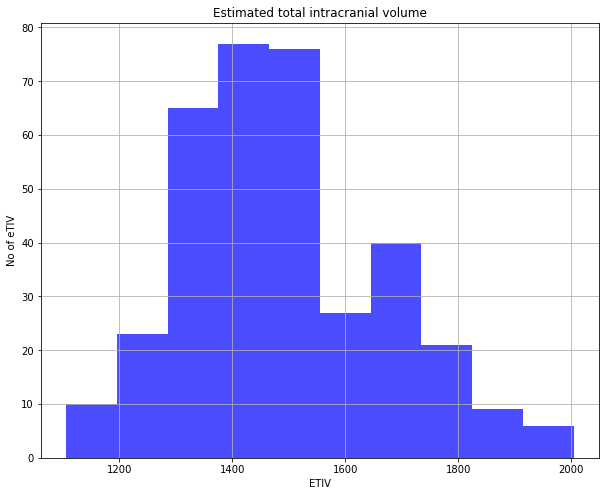

In [10]:
#Histogram Plot of ETIV
df["eTIV"].hist(figsize=(10,8), color="blue", alpha=0.7)
plt.title("Estimated total intracranial volume")
plt.xlabel("ETIV")
plt.ylabel("No of eTIV")
plt.show()

73    6.78
78    5.37
75    5.08
71    4.80
82    4.80
81    4.80
80    4.80
77    4.24
68    3.95
76    3.67
69    3.67
84    3.67
70    3.39
79    3.11
72    3.11
74    3.11
83    3.11
86    2.82
88    2.82
66    2.82
85    2.54
89    1.98
67    1.69
65    1.69
87    1.69
90    1.41
62    1.13
91    1.13
61    1.13
92    1.13
64    0.85
93    0.85
63    0.85
60    0.56
95    0.28
94    0.28
97    0.28
96    0.28
98    0.28
Name: Age, dtype: float64

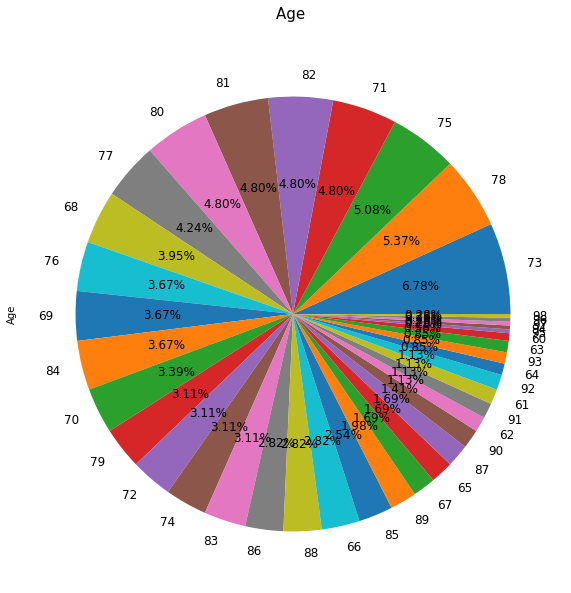

In [11]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return np.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'Age')

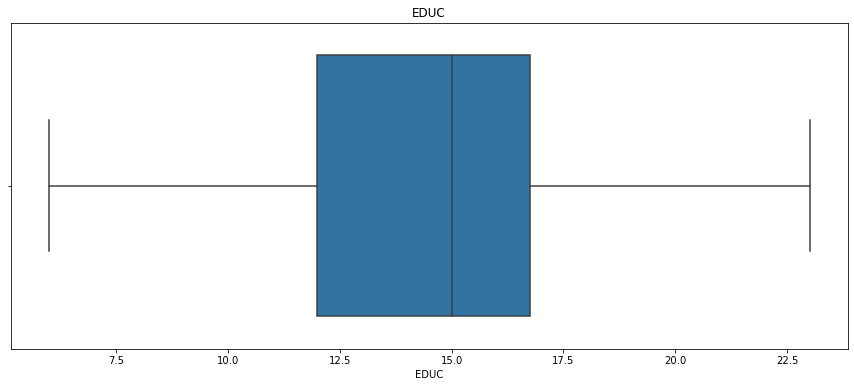

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df.EDUC, ax =ax)
plt.title("EDUC")
plt.show()

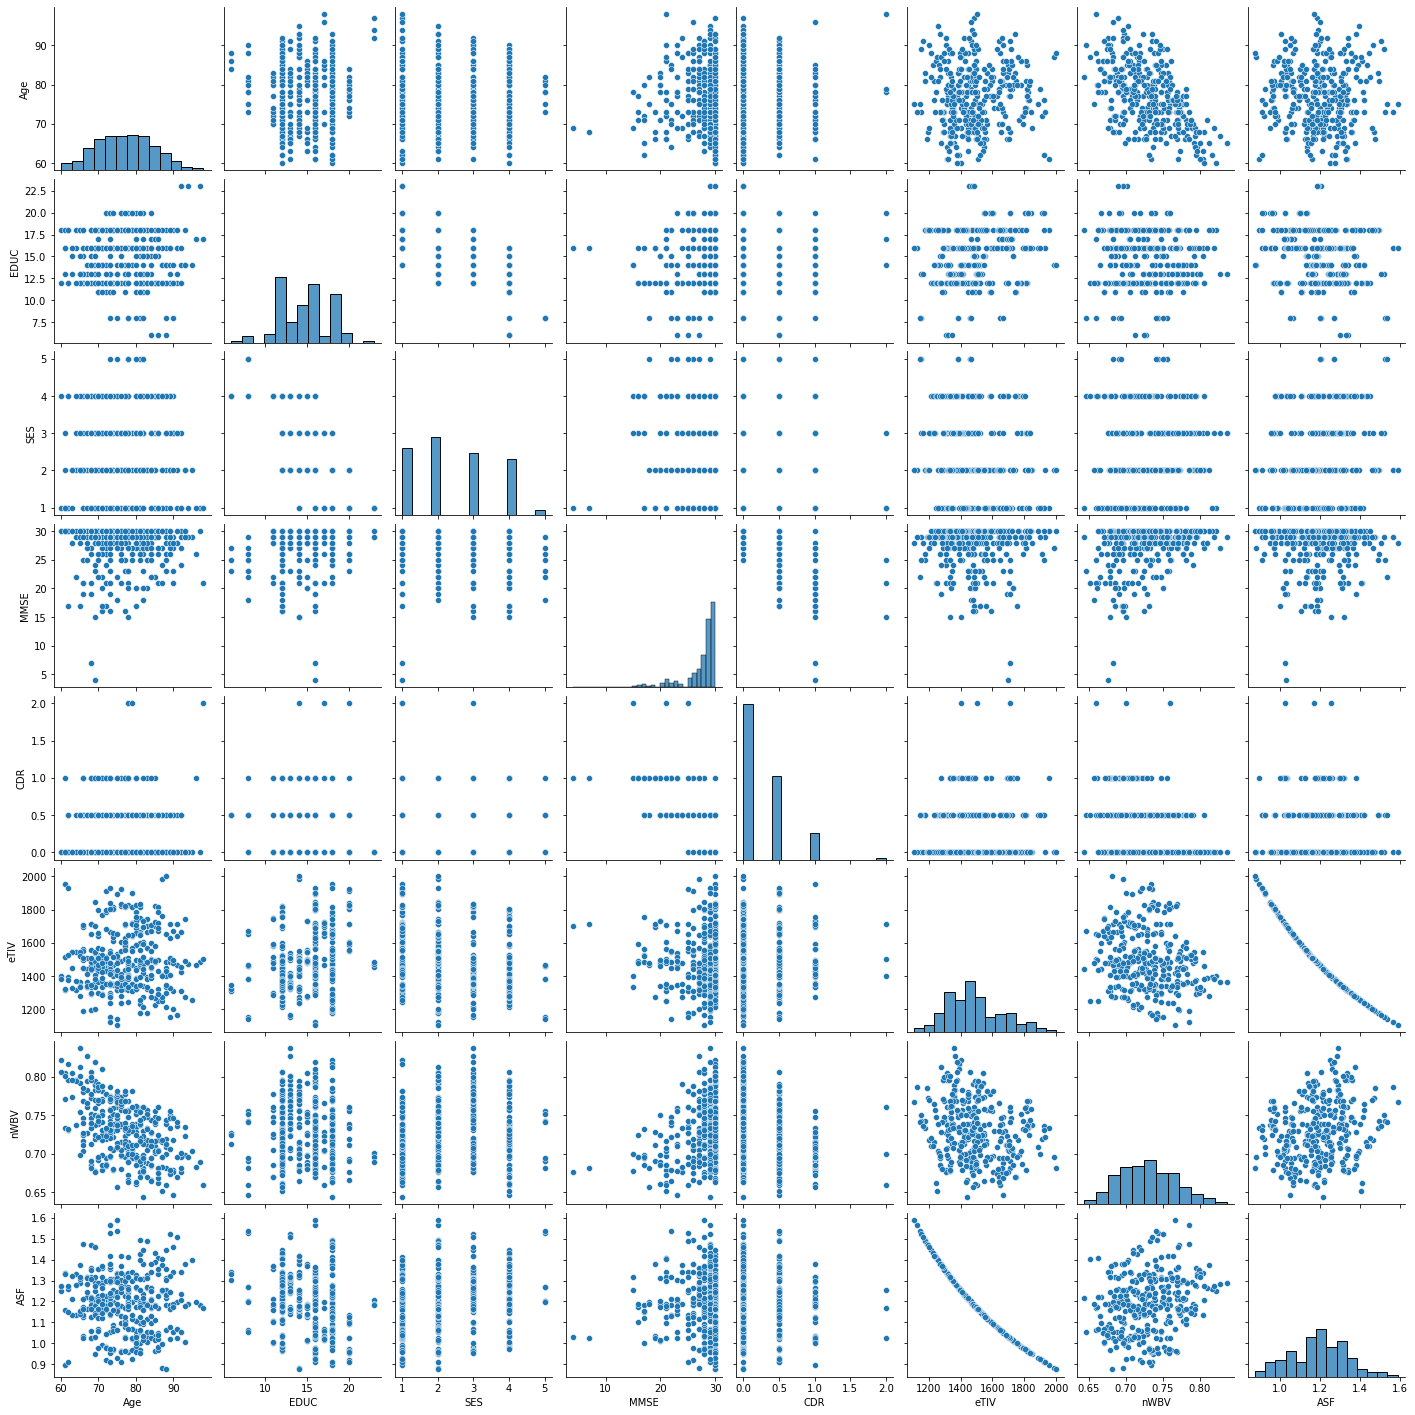

In [13]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

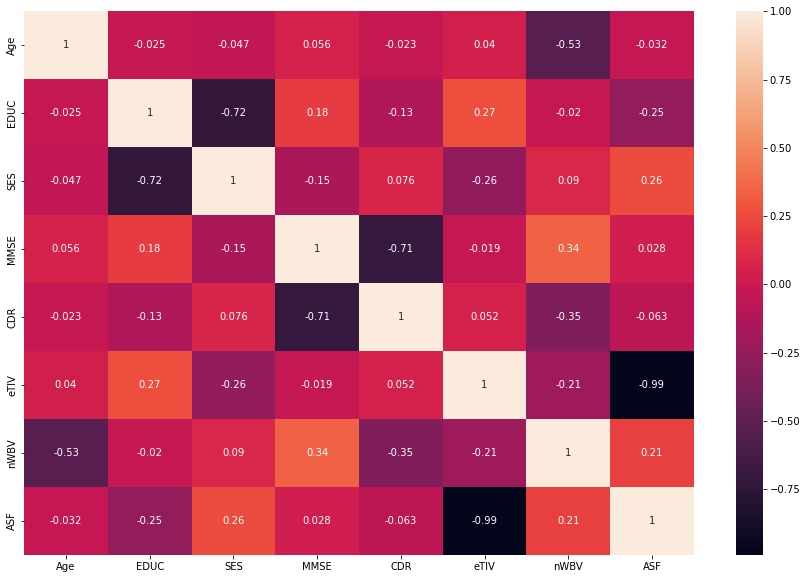

In [14]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True)

Spliting Train/Test:

In [15]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Group', axis=1)
#Response variable
y = df.loc[:,'Group'] 

In [16]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  247
Number of test dataset:  107
Total number of dataset:  354


In [17]:
def qul_No_qul_bar_plot(df, bygroup):
    dataframe_by_Group = pd.crosstab(df[bygroup], columns=df["Group"], normalize = 'index')
    dataframe_by_Group = np.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(15,7));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Alzheimer affected or not by given attributes (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



Group,Demented,Nondemented
Age,,
60,0.00,100.00
61,25.00,75.00
62,50.00,50.00
63,0.00,100.00
64,33.33,66.67
65,33.33,66.67
66,60.00,40.00
67,66.67,33.33
68,57.14,42.86


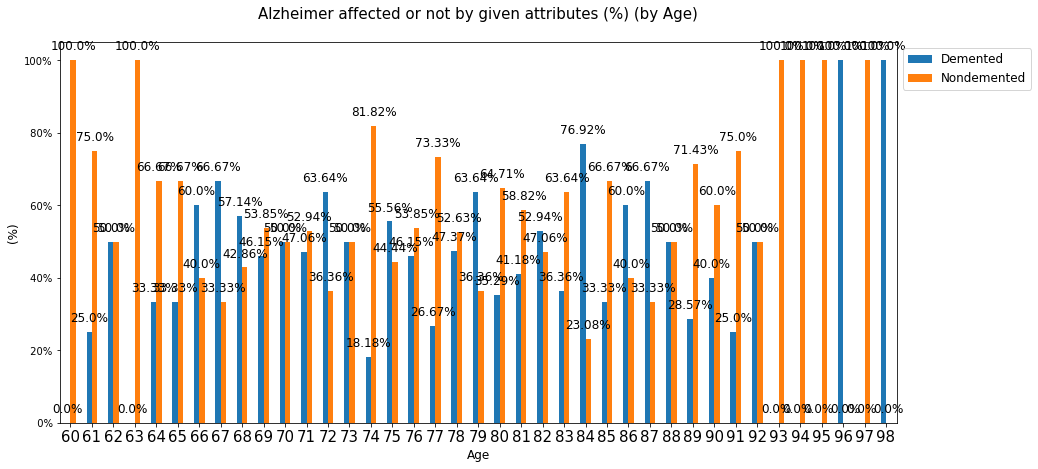

In [18]:
qul_No_qul_bar_plot(df, 'Age')